In [288]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import sparse as sp
from scipy import linalg as la
from sklearn.cross_validation import train_test_split as tts

%matplotlib inline

# Penalized Likelihood and Soft Thresholding

In [43]:
def soft_thresh(y, lam):
    try:
        n = y.shape[0]
    except:
        n=1
    return np.sign(y) * np.maximum((np.abs(y) - lam), np.zeros(n))

##Part A

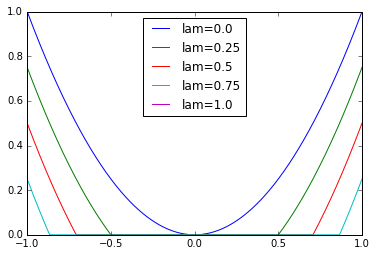

In [3]:
X = np.linspace(-1, 1, 401)
y = X**2
for i in np.linspace(0,1,5):
    plt.plot(X, soft_thresh(y, i), label="lam=" + str(i))
plt.legend(loc='best')
plt.show()

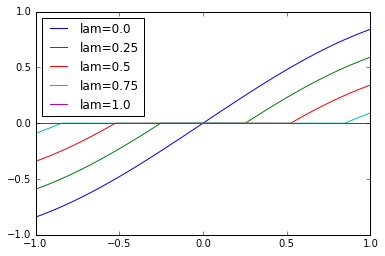

In [4]:
X = np.linspace(-1, 1, 401)
y = np.sin(X) 
for i in np.linspace(0,1,5):
    plt.plot(X, soft_thresh(y, i), label="lam=" + str(i))
plt.legend(loc='best')
plt.show()

##Part B

In [64]:
# 1.
sparsity = .1
n = 50
theta = sp.rand(1,n, density=sparsity, format='csr')
variance = np.random.rand(n)**2

In [65]:
# 2. Simulate one data point (z_i| theta_i) ~ N(theta_i, var_i) for each theta_i
def generate_draws(theta, var):
    '''
    Inputs:
    theta: A sparse csr matrix of N means
    var: A dense N vector of variances
    
    Output:
    y: A dense N vector of random draws from gaussian distributions s.t. y_i is a 
        random draw from N(theta_i, var_i)    
    '''
    # Check and ensure sparse format
    if not sp.isspmatrix_csr(theta):
        theta = sp.csr_matrix(theta)
    index = theta.indices
    stdv = np.sqrt(var) # Numpy takes the standard variation, not variance
    y = np.random.normal(scale=stdv)
    y[index] = np.random.normal(loc = theta.data, scale=stdv[index])
    return y
    
y = generate_draws(theta, variance)

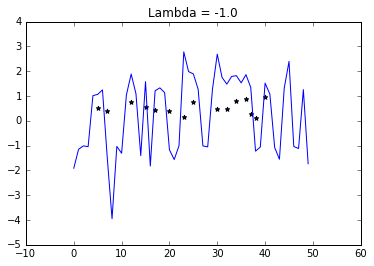

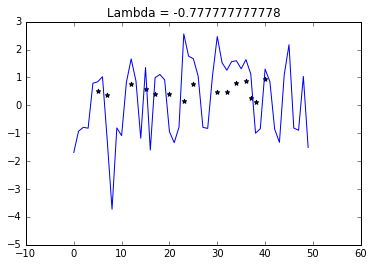

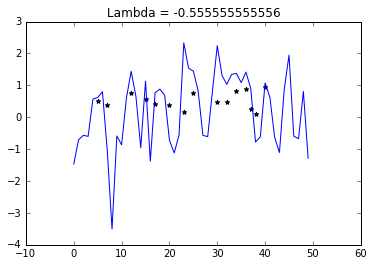

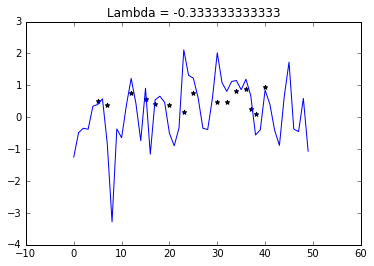

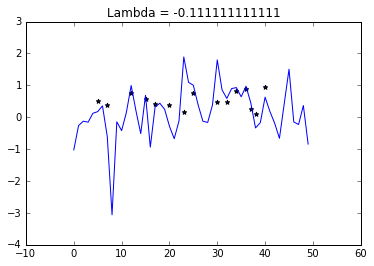

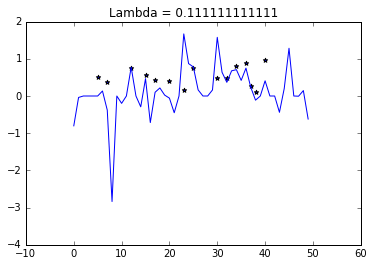

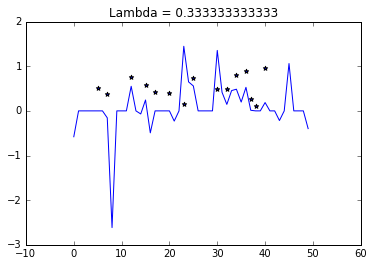

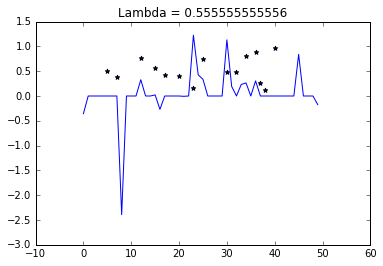

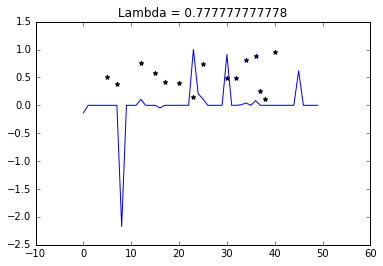

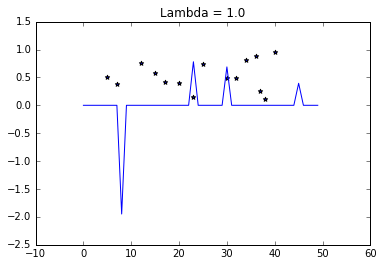

In [90]:
# Part 3: Plot \theta vs. threshhold(y) for various values of lambda
sparsity = .3
n = 50
theta = sp.rand(1,n, density=sparsity, format='csr')
variance = np.random.rand(n)**2
y = generate_draws(theta, variance)
lambdas = np.linspace(-1,1,10)
#lambdas = (np.ones(5)*10)**(-np.arange(5))
for i in lambdas:
    threshhold = soft_thresh(y, i)
    plt.plot(threshhold)
    plt.scatter(theta.indices, theta.data, marker='*')
    plt.title('Lambda = '+str(i))
    plt.show()

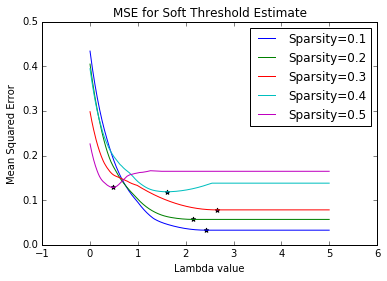

In [121]:
# Part 4:
n = 50
lambdas = np.linspace(0, 5, 401)
MSE = np.zeros_like(lambdas)
variance = np.random.rand(n)**2

density = np.arange(.1, .6, .1)

for sparsity in density:
    theta = sp.rand(1,n, density=sparsity, format='csr')
    y = generate_draws(theta, variance)
    
    # Calculate the MSE for each lambda value
    for i in np.arange(lambdas.shape[0]):
        threshhold = soft_thresh(y, lambdas[i])
        MSE[i] = 1. / n * ((threshhold - theta.toarray().ravel())**2).sum()
    
    # Plot the minimum of the MSE
    argmin = np.argmin(MSE)
    plt.scatter(lambdas[argmin], MSE[argmin], marker='*')
    # Plot the MSE
    plt.plot(lambdas, MSE, label='Sparsity='+str(sparsity))

# Overall Plot
plt.xlabel('Lambda value')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.title('MSE for Soft Threshold Estimate')
plt.show()

# The Lasso

In [132]:
from sklearn.linear_model import Lasso, lasso_path

In [274]:
# Download the data on diabetes progression in 442 adults
X = np.loadtxt('diabetesX.csv', skiprows=1, delimiter=',')
Y = np.loadtxt('diabetesY.csv')
X /= X.std(axis=0) # Standardixe the data

In [282]:
# Calculate the lasso path
alphas, coef_path, dual_gaps = lasso_path(X,Y)

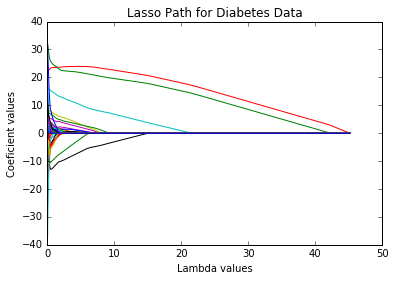

In [283]:
# Plot the lasso path
for i in coef_path:
    plt.plot(alphas, i)
plt.xlabel('Lambda values')
plt.ylabel('Coeficient values')
plt.title('Lasso Path for Diabetes Data')
plt.show()

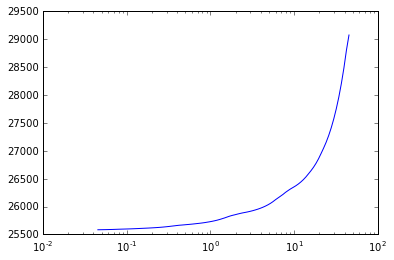

In [284]:
# Calculate the in-sample mean-squared prediction error
n = Y.shape[0]
XB = np.dot(X, coef_path)
Y_XB = Y - XB.T
MSE = 1. / n * (np.linalg.norm(Y_XB, axis=1))**2
plt.semilogx(alphas, MSE)
plt.show()

In [269]:
L = Lasso()
L.fit(X,Y)
L.intercept_

152.13348416289594